# Let's Grow More - "Data Science Intern"

## LGMVIP - August 2023

## By - Mehul Sharma

## Beginner Task

### TASK-2 - Stock Market Prediction And Forecasting using Stacked LSTM :

In [31]:
!pip3 install tensorflow

In [32]:
#import the libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [33]:
# reading the data
data = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df=pd.read_csv(data,index_col=0)
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [34]:
df.shape

(2035, 7)

In [35]:
df.head(15)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41


In [36]:
df.tail(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17


In [37]:
df.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2+ KB


In [39]:
df.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [40]:
dp=df.reset_index()['Close']
dp

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [41]:
ndf= pd.read_csv(r'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv', parse_dates=['Date'])

ndf['Date']= pd.to_datetime(ndf['Date'], errors='coerce')
print (type(ndf.Date[0]))

ndf.sort_values(by=['Date'], inplace=True, ascending=True)
ndf.Date.head()


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

## Data Visualization

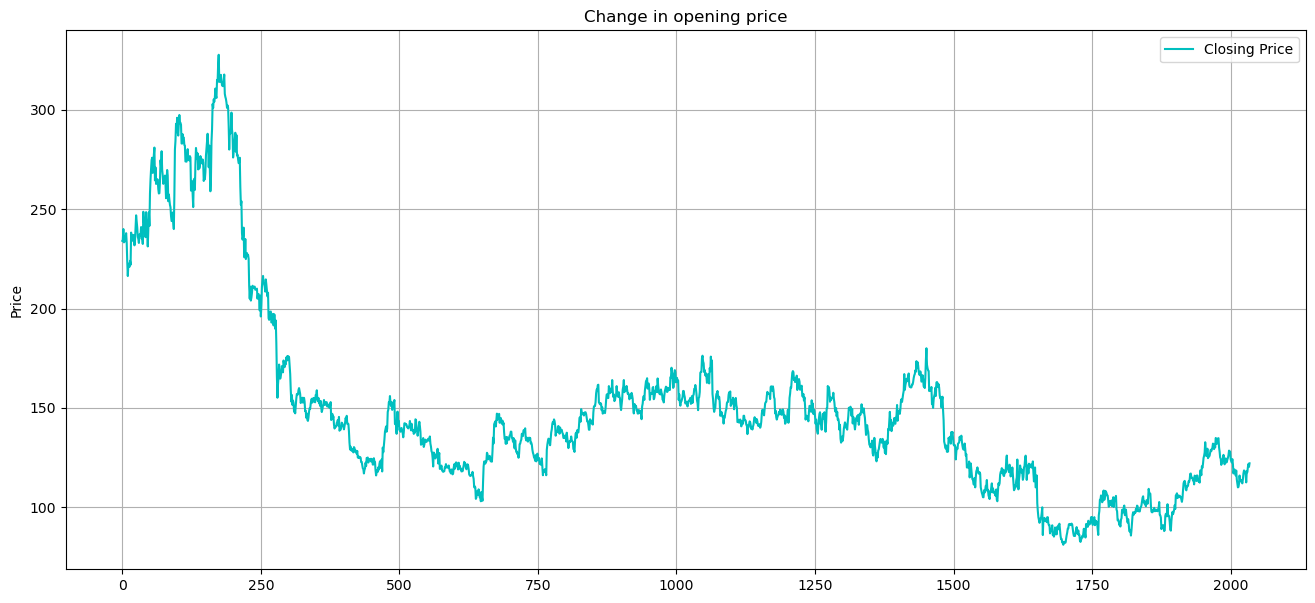

In [42]:
plt.figure(figsize=(20,9))
ndf['Open'].plot(kind='line',figsize=(16,7),color='c',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in opening price")
plt.grid()

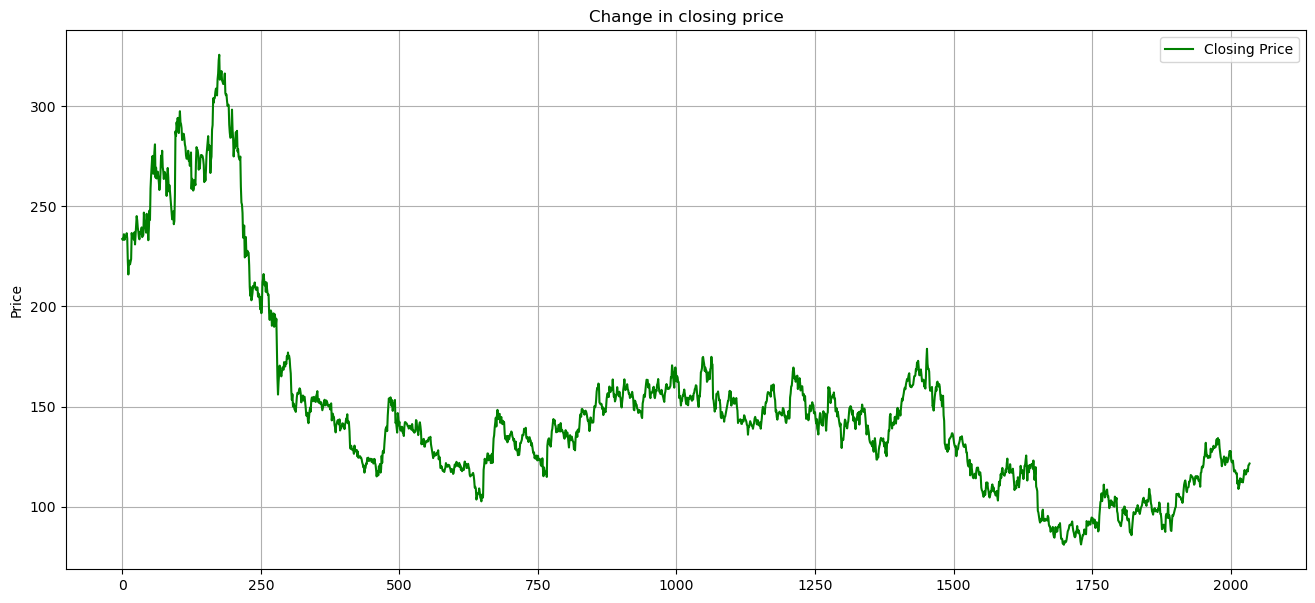

In [43]:
plt.figure(figsize=(20,9))
ndf['Close'].plot(kind='line',figsize=(16,7),color='g',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price")
plt.grid()

### Min Max Scaler

In [44]:
ndf.reset_index(inplace=True)
ndf
close_df=ndf['Close']
close_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [45]:
slr=MinMaxScaler(feature_range=(0,1))
close_df=slr.fit_transform(np.array(close_df).reshape(-1,1))
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Training and Testing

In [48]:
tr_s=int(len(close_df)*0.56)
tt_s=len(close_df)-tr_s
d_train, d_test=close_df[0:tr_s,:], close_df[tt_s:len(close_df),:1]

In [49]:
d_train

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.30330882],
       [0.31229575],
       [0.30310458]])

In [50]:
d_test

array([[0.23672386],
       [0.24203431],
       [0.24264706],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [51]:
import numpy as np
def crt_dts(df, time_step=1):
    X=[]
    Y=[]
    for i in range(len(df)-time_step-1):
        t=i+time_step
        temp=df[i:t,0]
        X.append(temp)
        Y.append(df[t,0])
        return np.array(X), np.array(Y)
    

In [52]:
time_step=100
X_train, Y_train= crt_dts(d_train, time_step)
X_test, Y_test= crt_dts(d_test, time_step)


In [53]:
print(X_test.shape),print(Y_test.shape)

(1, 100)
(1,)


(None, None)

In [54]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [55]:

temp= Sequential()
temp.add(LSTM(50, return_sequences=True,input_shape=(time_step,1)))
temp.add(LSTM(50,return_sequences=True))
temp.add(LSTM(50))
temp.add(Dense(1))
temp.compile(loss='mean_squared_error', optimizer='adam')

In [56]:
temp= Sequential()
temp.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
temp.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
temp.add(LSTM(50))
temp.add(Dense(1))
temp.compile(loss='mean_squared_error', optimizer='adam',metrics='acc')

In [57]:
temp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
temp.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs =100, batch_size = 64, verbose = 1);


Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.0153 - acc: 0.0000e+00 - val_loss: 0.0599 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 127ms/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.0358 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 108ms/step - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0161 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 105ms/step - loss: 2.1105e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 100ms/step - loss: 8.4984e-04 - acc: 0.0000e+00 - val_loss: 7.1980e-04 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 101ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 87ms/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 97ms/step - loss: 1.3347e-08 - acc: 0.0000e+00 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 99ms/step - loss: 9.7170e-07 - acc: 0.0000e+00 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 89ms/step - loss: 2.7776e-06 - acc: 0.0000e+00 - val_loss: 0.0144 - val_acc: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 111ms/step - loss: 4.3874e-06 - acc: 0.0000e+00 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 98ms/step - loss: 5.0192e-06 - acc: 0.0000e+00 - val_loss: 0.0144 - val_acc: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 106ms/step - loss: 4.4545e-06 - acc: 0.0000e+00 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 64/100
1/1 [==============================] - 0s 106ms/step - loss: 3.0453e-06 - acc: 0.0000e+00 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 65/

## Evaluation

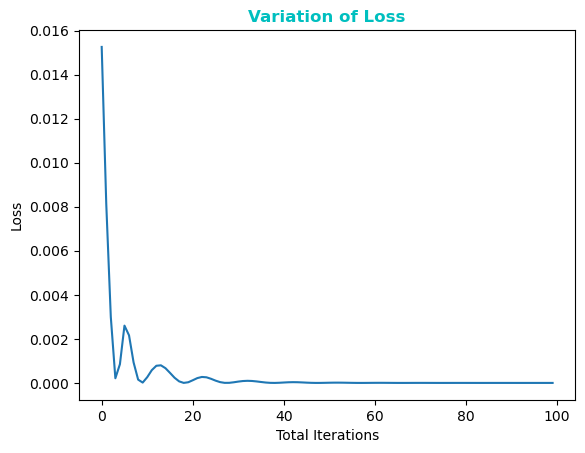

In [59]:
l=temp.history.history['loss']
plt.plot(l)
plt.xlabel("Total Iterations")
plt.ylabel("Loss")
plt.title("Variation of Loss",color="c",fontsize=12,fontweight="bold");


In [60]:
pred1=temp.predict(X_train)

1/1 [==============================] - 2s 2s/step


In [61]:
pred2=temp.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [62]:
pred1=slr.inverse_transform(pred1)
pred2=slr.inverse_transform(pred2)

In [63]:
math.sqrt(mean_squared_error(Y_train,pred1))

110.82234386369294

In [64]:
math.sqrt(mean_squared_error(Y_test,pred2))

123.34362847820606

## Plots

Text(0, 0.5, 'Close Price')

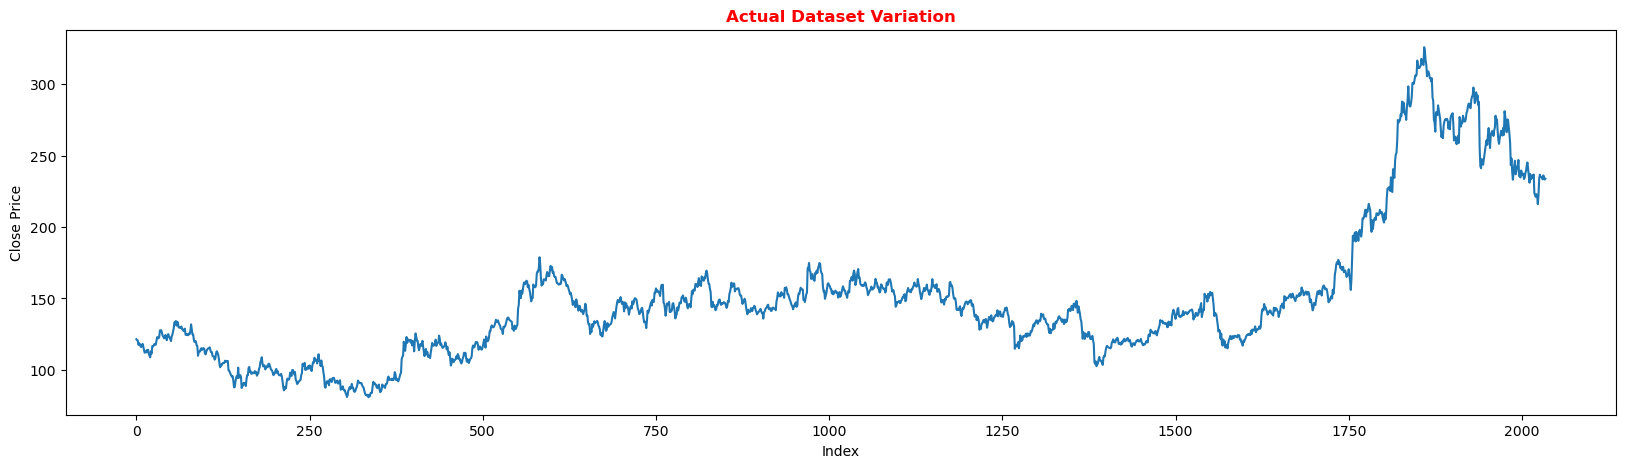

In [66]:
# shift train predictions 
slb=100
tpp = np.empty_like(close_df)
tpp[:, :] = np.nan
tpp[slb:len(pred1)+slb, :] = pred1

# shift test predictions 
tpt = np.empty_like(close_df)
tpt[:, :] = np.nan
tpt[len(pred1)+(slb*2)+1:len(dp)-1, :] = pred2

# plot baseline and predictions
plt.figure(figsize=(20,5))
plt.plot(slr.inverse_transform(close_df))
plt.title("Actual Dataset Variation",color="red",fontsize=12,fontweight="bold")
plt.xlabel("Index")
plt.ylabel("Close Price")




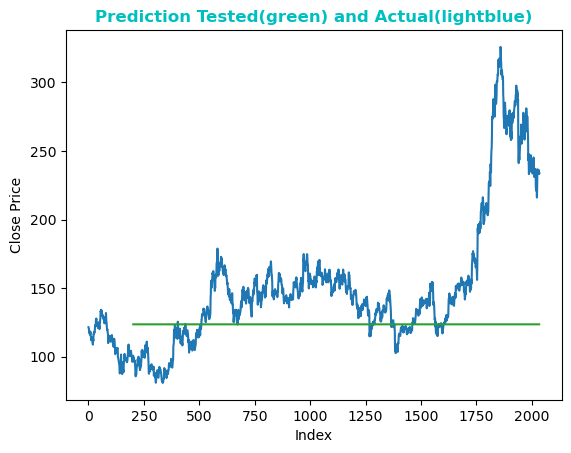

In [69]:

plt.plot(slr.inverse_transform(close_df))
plt.plot(tpp)
plt.plot(tpt)

plt.title("Prediction Tested(green) and Actual(lightblue)",color="c",fontsize=12,fontweight="bold")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()